# Variability VS frequency

### Same fire but with different frequency

faire un "étirement" !?

In [4]:
import numpy as np
import matplotlib.pyplot as plt

exec(open("ode2.py").read(), globals())

In [5]:
a = 0.2
m = 0.5
Param_phy = [a, m]      # 0.2, 10
      
Init = [1., .5]



Param_freq = {"p":  .8}#2
dt = min([0.1, 0.1/Param_freq["p"]])


finalTime = 100
Param_strength = {"scale":0.01} # 0.0008
Param_coupled = {"alpha":10., # 20
                 "beta":1.}# 500



Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

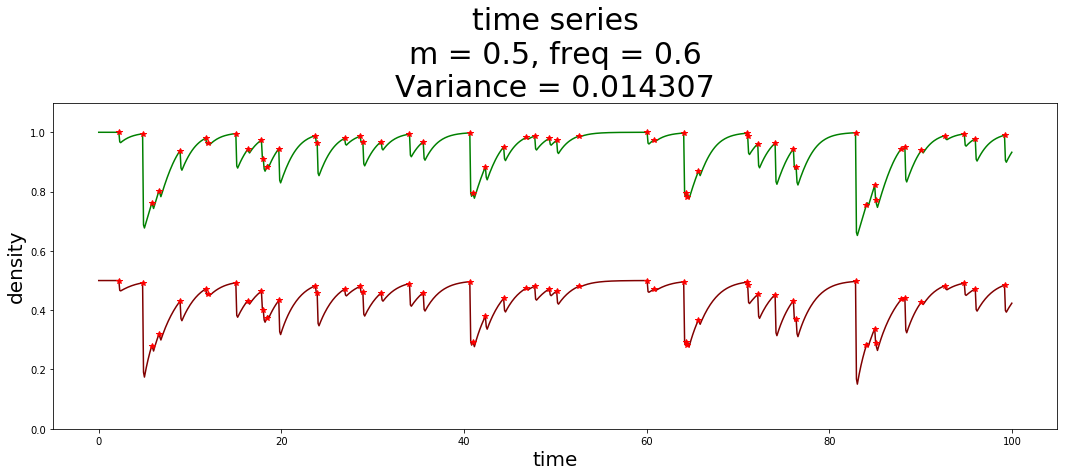

In [8]:
nParall = 1
m = 0.5
Param_phy[1] = m
Freq = [0.6, 0.8, 1.2]
Fire_events = np.zeros((nParall, 1000), dtype="bool")
Fire_strength = np.zeros((nParall, 1000))
plt.figure(figsize = (18, 6))
for j in range(nParall):
    Param_freq = {"p":  Freq[j]}
    Fire_param["param_freq"] = Param_freq
    O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
    Fire_events[j, :] = O.Fire_events
    Fire_strength[j] = O.Fire_strength
    O.solve_by_part()
    var = O.variability("N+W")
    #plt.figure(figsize = (12, 6))
    plt.subplot(1, nParall, j+1)
    O.plot_time_series(generation=False, show=False, legend = False)
    plt.title("time series\nm = "+str(m)+", freq = "+str(Freq[j])+"\nVariance = "+str(round(var, 6)), fontsize = 30)
plt.show()

#### Etirements de l'array Fire Fire_events[j, :] et Fire_strength[j]